In [1]:
# Objective:
# This assignment aims to equip you with practical skills in data preprocessing, feature engineering, 
# and feature selection techniques, which are crucial for building efficient machine learning models. 
# You will work with a provided dataset to apply various techniques such as scaling, encoding, 
# and feature selection methods including isolation forest and PPS score analysis.

In [2]:
# Dataset:
# Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

In [3]:
# 1. Data Exploration and Preprocessing:

In [4]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Loading the dataset

df = pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.shape

(32561, 15)

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

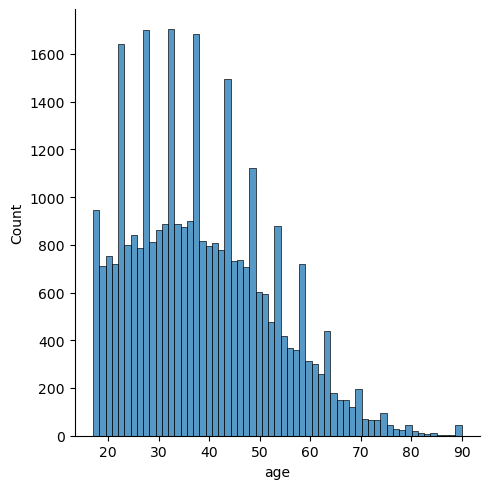

In [12]:
# Visualizations

sns.displot(df['age'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14676\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

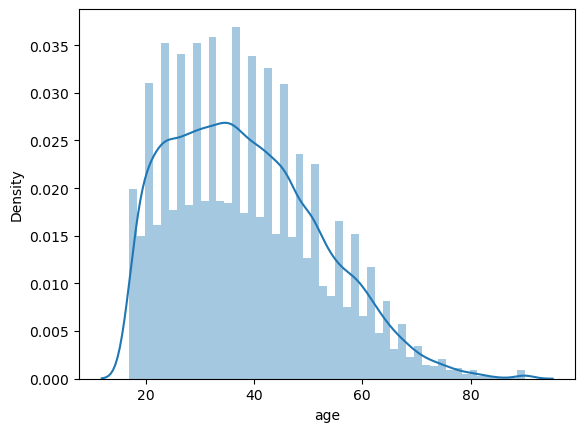

In [13]:
sns.distplot(df['age'])

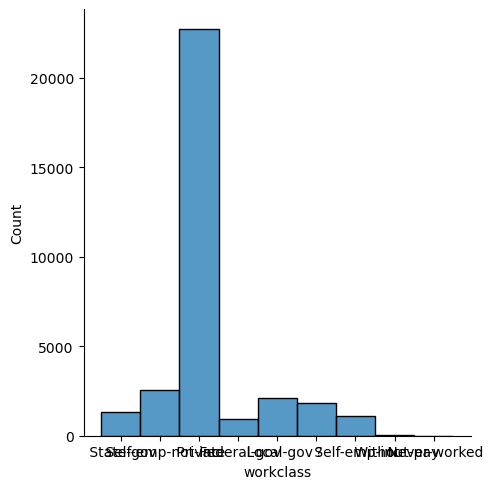

In [14]:
sns.displot(df['workclass'])

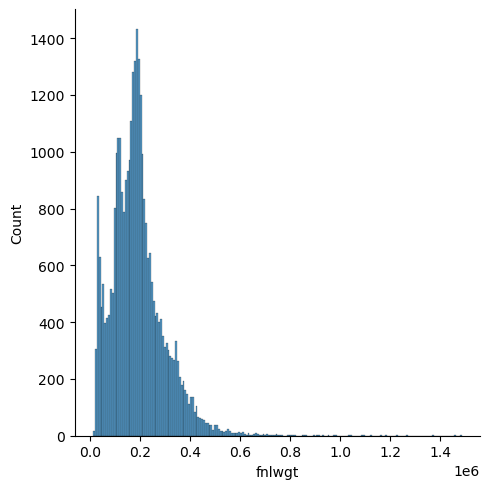

In [15]:
sns.displot(df['fnlwgt'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14676\3205066975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fnlwgt'])


<Axes: xlabel='fnlwgt', ylabel='Density'>

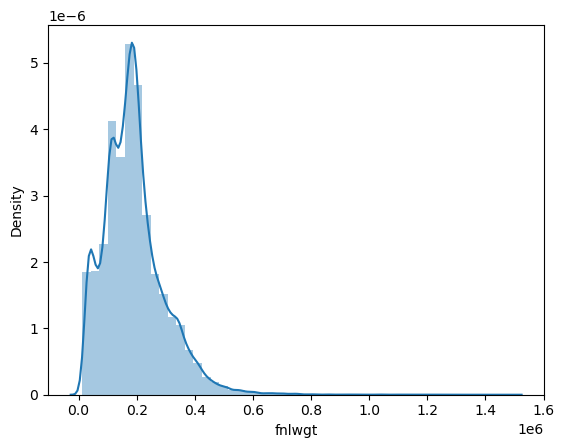

In [16]:
sns.distplot(df['fnlwgt'])

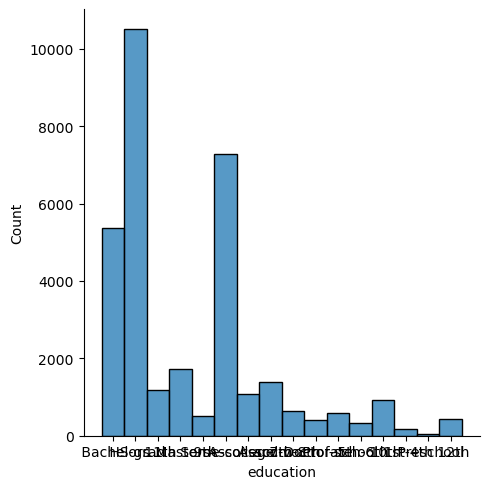

In [17]:
sns.displot(df['education'])

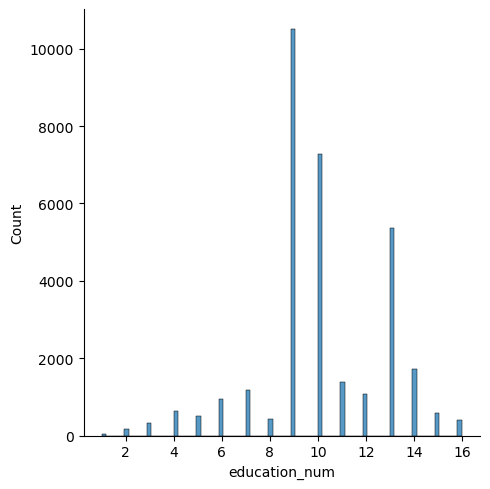

In [18]:
sns.displot(df['education_num'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14676\2078037030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['education_num'])


<Axes: xlabel='education_num', ylabel='Density'>

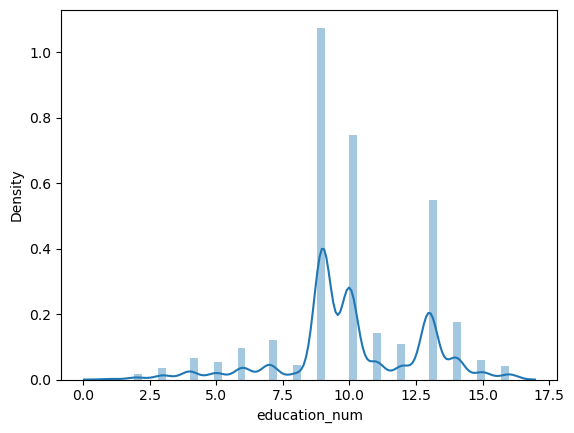

In [19]:
sns.distplot(df['education_num'])

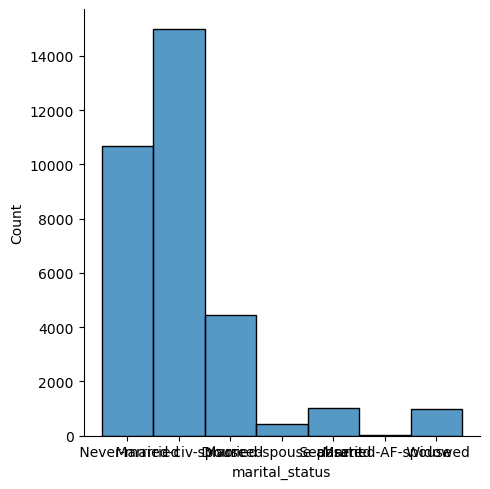

In [20]:
sns.displot(df['marital_status'])

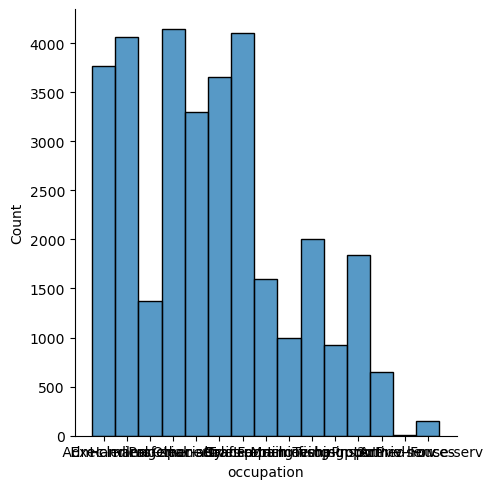

In [21]:
sns.displot(df['occupation'])

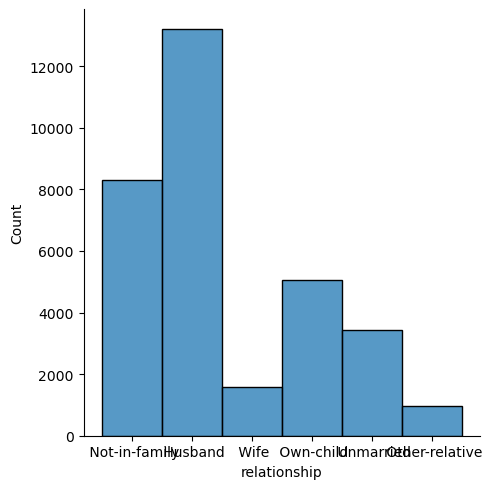

In [22]:
sns.displot(df['relationship'])

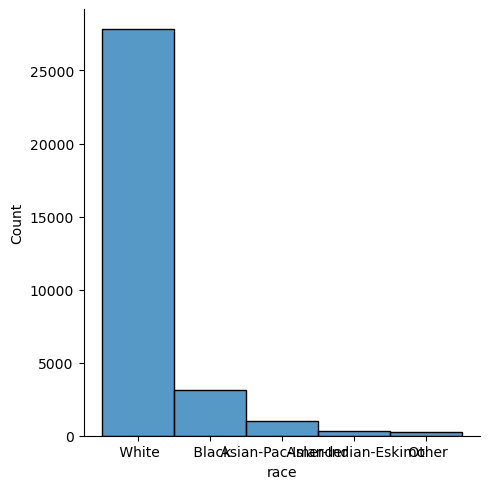

In [23]:
sns.displot(df['race'])

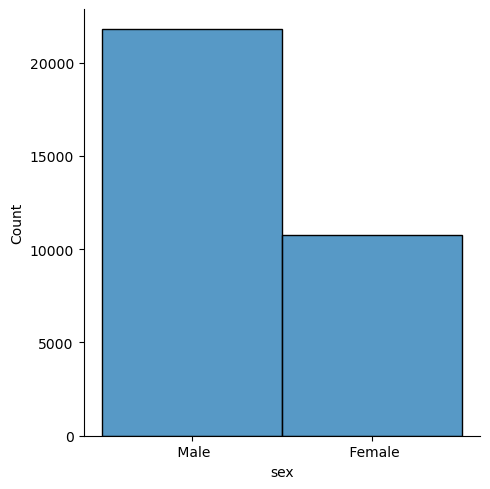

In [24]:
sns.displot(df['sex'])

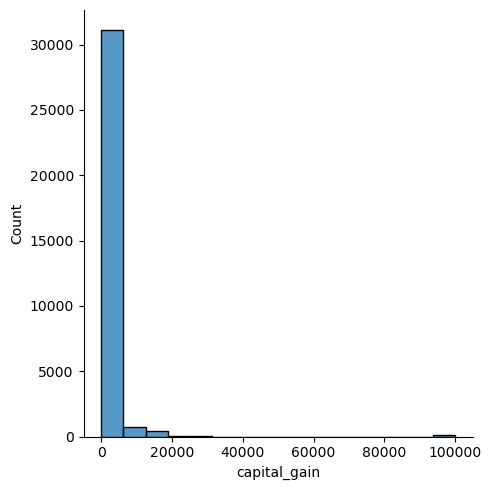

In [25]:
sns.displot(df['capital_gain'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14676\1800412609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital_gain'])


<Axes: xlabel='capital_gain', ylabel='Density'>

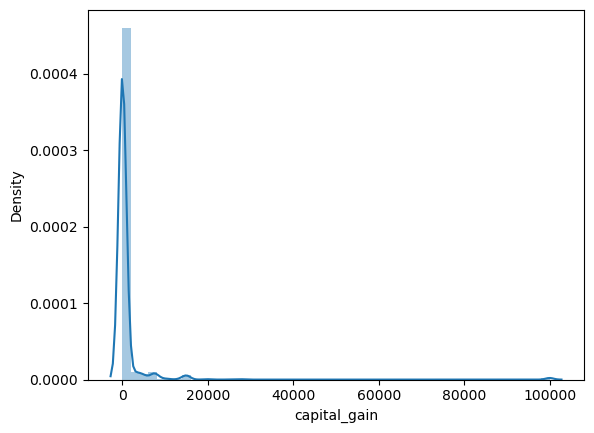

In [26]:
sns.distplot(df['capital_gain'])

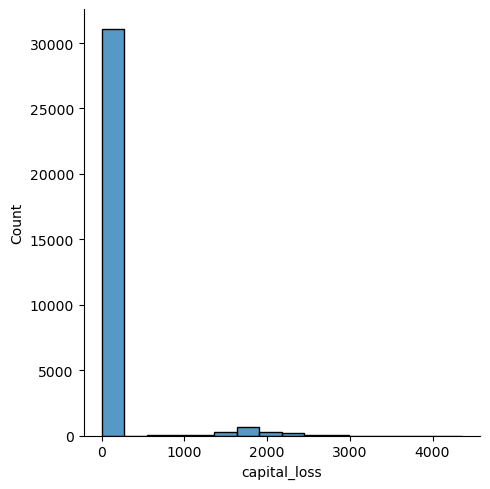

In [27]:
sns.displot(df['capital_loss'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14676\1583422250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital_loss'])


<Axes: xlabel='capital_loss', ylabel='Density'>

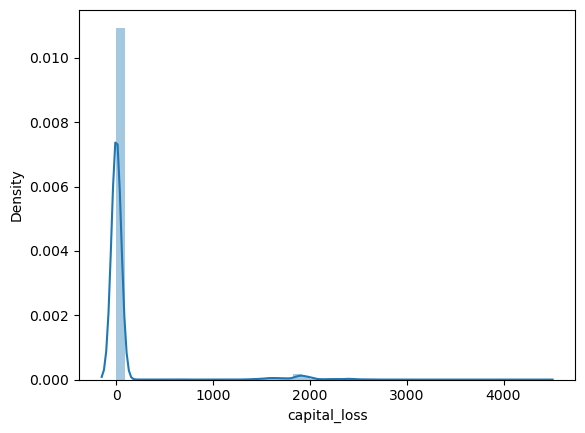

In [28]:
sns.distplot(df['capital_loss'])

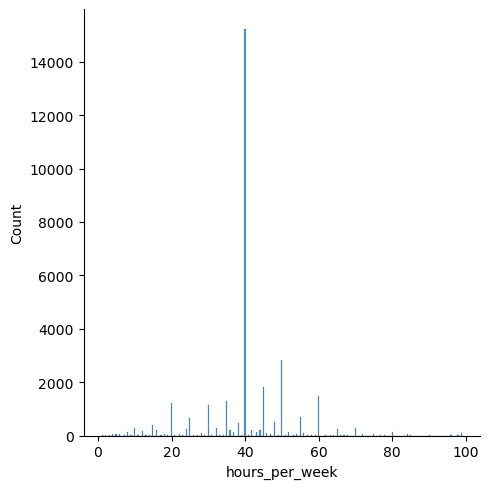

In [29]:
sns.displot(df['hours_per_week'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14676\846595699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours_per_week'])


<Axes: xlabel='hours_per_week', ylabel='Density'>

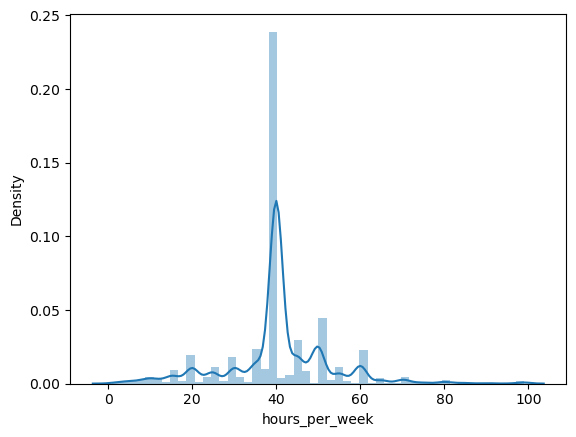

In [30]:
sns.distplot(df['hours_per_week'])

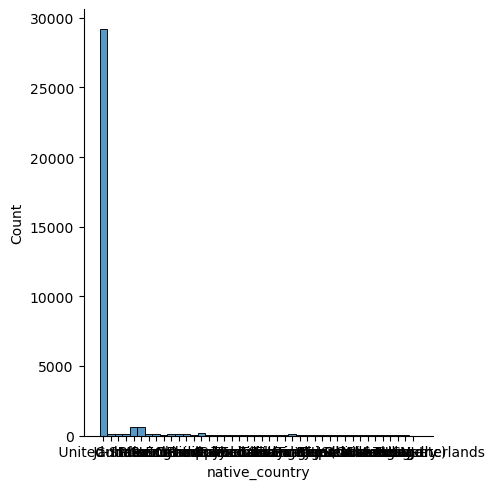

In [31]:
sns.displot(df['native_country'])

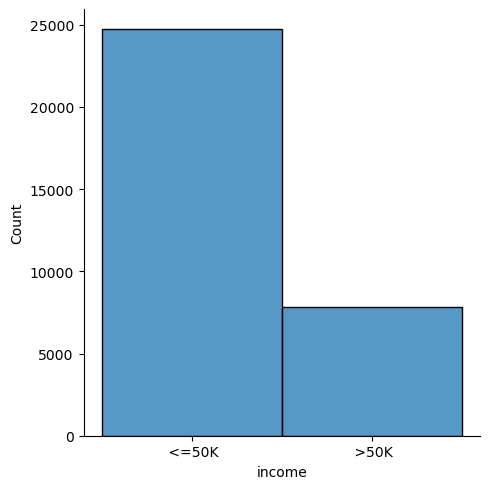

In [32]:
sns.displot(df['income'])

In [33]:
# Handling null values

df.isnull()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.isnull().sum()

# No null values in any of the columns

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [35]:
# Applying Scaling techniques to numerical features

# Identifying numerical columns

df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [36]:
# Standard scaling

from sklearn.preprocessing import StandardScaler

for col in df_numerics_only:
    ss = StandardScaler()
    df_numerics_only[col] = ss.fit_transform(df_numerics_only[[col]])
    
df_numerics_only

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [37]:
# MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

for col in df_numerics_only:
    mx = MinMaxScaler()
    df_numerics_only[col] = mx.fit_transform(df_numerics_only[[col]])
    
df_numerics_only

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [38]:
# StandardScaler removes the mean and scales the data to unit variance. 
# The scaling shrinks the range of the feature values

# MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]

In [39]:
# Identifying categorical columns

df_categorical_only = df.select_dtypes(include=np.object)
df_categorical_only

C:\Users\mihir\AppData\Local\Temp\ipykernel_14676\1584589091.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical_only = df.select_dtypes(include=np.object)


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [40]:
# Identifying categorical columns with less than and more than 5 categories

print("Workclass:",len(df_categorical_only.workclass.unique()))
print("education:",len(df_categorical_only.education.unique()))
print("marital_status:",len(df_categorical_only.marital_status.unique()))
print("occupation:",len(df_categorical_only.occupation.unique()))
print("relationship:",len(df_categorical_only.relationship.unique()))
print("race:",len(df_categorical_only.race.unique()))
print("sex:",len(df_categorical_only.sex.unique()))
print("native_country:",len(df_categorical_only.native_country.unique()))
print("income:",len(df_categorical_only.income.unique()))

Workclass: 9
education: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native_country: 42
income: 2


In [41]:
# One hot encoding - To be applied to sex and income having categories less than 5

gender=pd.get_dummies(df['sex'],drop_first=True)
df = df.drop('sex',axis=1)
df = pd.concat([df,gender],axis=1)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,1


In [42]:
income=pd.get_dummies(df['income'],drop_first=True)
df = df.drop('income',axis=1)
df = pd.concat([df,income],axis=1)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Male,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,1,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,1,0


In [43]:
# Label encoding - To be applied to columns with 5 or more categories

print("Workclass:",len(df_categorical_only.workclass.unique()))
print("education:",len(df_categorical_only.education.unique()))
print("marital_status:",len(df_categorical_only.marital_status.unique()))
print("occupation:",len(df_categorical_only.occupation.unique()))
print("relationship:",len(df_categorical_only.relationship.unique()))
print("race:",len(df_categorical_only.race.unique()))
print("sex:",len(df_categorical_only.sex.unique()))
print("native_country:",len(df_categorical_only.native_country.unique()))
print("income:",len(df_categorical_only.income.unique()))

Workclass: 9
education: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native_country: 42
income: 2


In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ['workclass','education','marital_status','occupation','relationship','race','native_country']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Male,>50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0


In [45]:
# Feature engineering

print("hours_per_week:",df.hours_per_week.unique())

hours_per_week: [40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]


In [46]:
# 1. We will add a column called Productivity in terms of hours per week data

if (df['hours_per_week'] < 25).any():
    df['Productivity'] = 'Low'
elif df[df['hours_per_week'] >= 25] & df[df['hours_per_week'] <= 40]:
    df['Productivity'] = 'Normal'
elif df[df['hours_per_week'] > 40] & df[df['hours_per_week'] <= 75]:
    df['Productivity'] = 'High'
elif df[df['hours_per_week'] > 75]:
    df['Productivity'] = 'Very high'

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Male,>50K,Productivity
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,Low
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,Low
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,Low
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,Low
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,Low
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,Low
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,Low
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,Low


In [47]:
print("capital_gain:",df.capital_gain.unique())

capital_gain: [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]


In [48]:
# 2. We will add a column called Returns in terms of capital gains

if (df['capital_gain'] < 5000).any():
    df['Returns'] = 'Low'
elif df[df['capital_gain'] >= 5000] & df[df['capital_gain'] <= 25000]:
    df['Returns'] = 'Normal'
elif df[df['capital_gain'] > 25000] & df[df['capital_gain'] <= 50000]:
    df['Returns'] = 'High'
elif df[df['capital_gain'] > 50000]:
    df['Returns'] = 'Very high'

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Male,>50K,Productivity,Returns
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,Low,Low
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,Low,Low
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,Low,Low
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,Low,Low
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,Low,Low
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,Low,Low
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,Low,Low
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,Low,Low


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '33'),
 Text(33, 0, '34'),
 Text(34, 0, '35'),
 Text(35, 0, '36'),
 Text(36, 0, '37'),
 Text(37, 0, '38'),
 Text(38, 0, '39'),
 Text(39, 0, '40'),
 Text(40, 0, '41'),
 Text(41, 0, '42'),
 Text(42, 0, '43'),
 Text(43, 0, '44'),
 Text(44, 0, '45'),
 Text(45, 0, '46'),
 Text(46, 0, '47'),
 Text(47, 0, '48'),
 Text(48, 0, '49'),
 Text(49, 0, '50'),
 Text(50, 0, '51'),

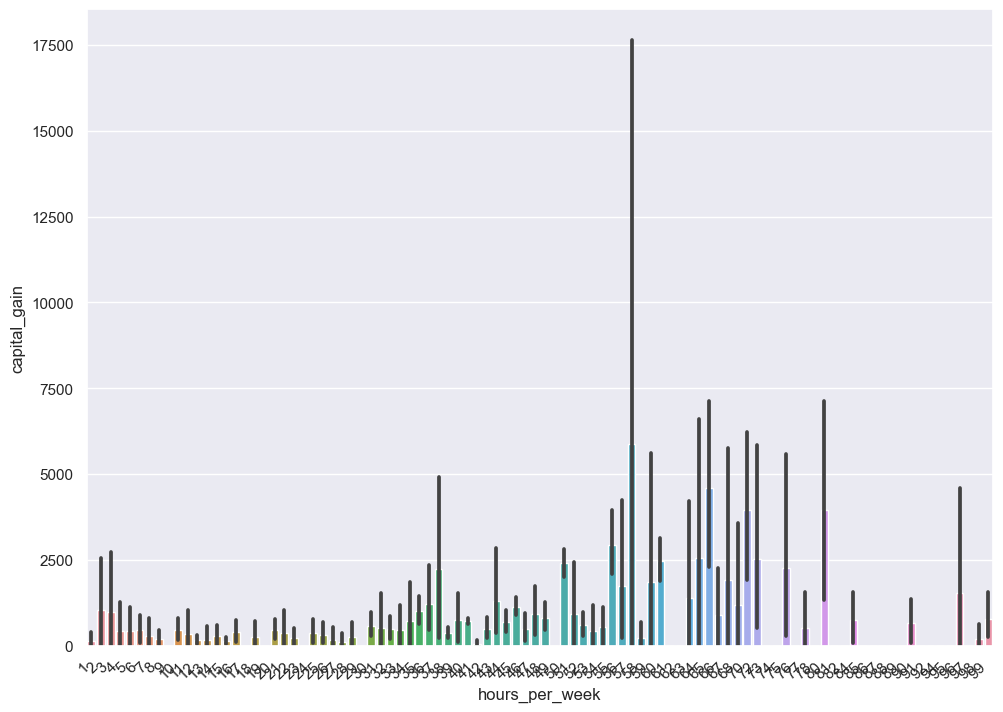

In [58]:
# Applying log transformation

sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='hours_per_week', y = 'capital_gain', data = df)
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')

[None]

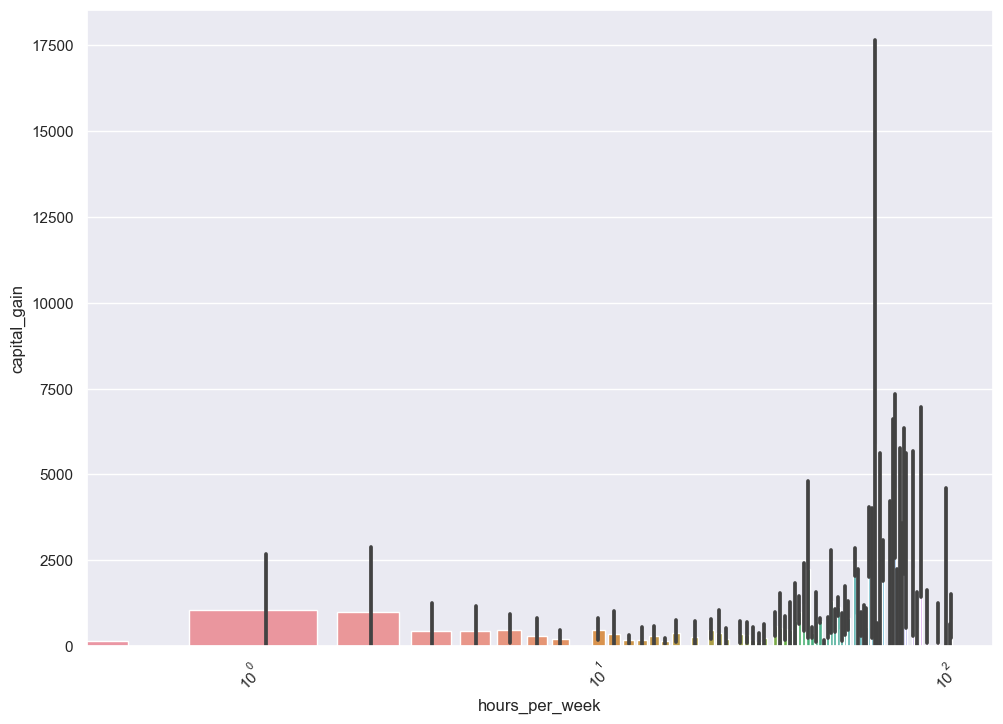

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='hours_per_week', y = 'capital_gain', data = df)
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
g.set(xscale='log')

In [62]:
# Isolation Forest algorithm

# We will use hours per week and capital gains for outlier detection

from sklearn.ensemble import IsolationForest

anomaly_inputs = ['hours_per_week','capital_gain']
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_inputs])

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [63]:
df['anomaly_inputs'] = model_IF.decision_function(df[anomaly_inputs])

In [64]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [66]:
df.loc[:,['hours_per_week','capital_gain','anomaly_inputs','anomaly']]

,hours_per_week,capital_gain,anomaly_inputs,anomaly
0,40,2174,0.046962,1
1,13,0,0.020667,1
2,40,0,0.232699,1
3,40,0,0.232699,1
4,40,0,0.232699,1
...,...,...,...,...
32556,38,0,0.167764,1
32557,40,0,0.232699,1
32558,40,0,0.232699,1
32559,20,0,0.110015,1


In [75]:
def outlier_plot(data,outlier_method_name,x_var,y_var,
                xaxis_limits=[0,1],yaxis_limits=[0,1]):
    print(f'Outlier Method:{outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly'] == -1])}")
    print(f"Number of non-anomalous values {len(data[data['anomaly'] == 1])}")
    print(f'Total no of values:{len(data)}')
          
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly'] == -1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly'] == 1])} points")
    return g

Outlier Method:Isolation Forest
Number of anomalous values 3246
Number of non-anomalous values 29315
Total no of values:32561


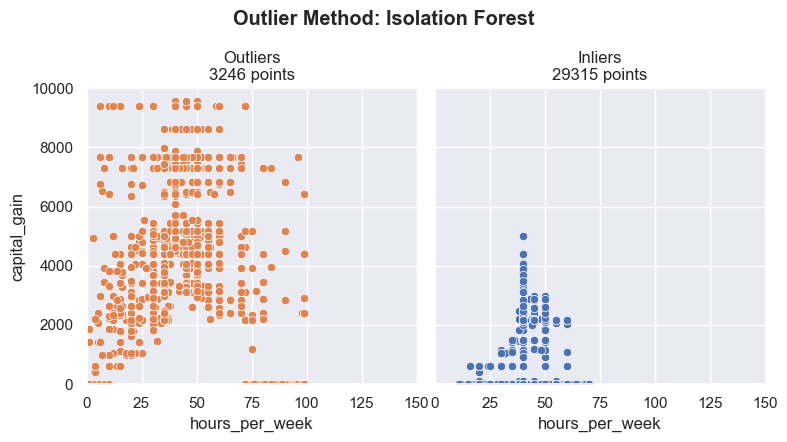

In [84]:
outlier_plot(df, 'Isolation Forest', 'hours_per_week','capital_gain', [0,150], [0,10000])

In [85]:
# Predictive Power Score

!pip install ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13201 sha256=ff00dccf806fa852126ba18813a8b3812c9187814a1ac872ab8e4ae984b0aa4e
  Stored in directory: c:\users\mihir\appdata\local\pip\cache\wheels\75\7d\d8\afa17f5fd8fd6160a8816f4a2bd6be3e9d65638778a02c2d6c
Successfully built ppscore


In [86]:
import ppscore as pps

In [87]:
pps.score(df,'hours_per_week','capital_gain')

{'x': 'hours_per_week',
 'y': 'capital_gain',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1093.884,
 'model_score': 1952.2690234493728,
 'model': DecisionTreeRegressor()}